<a href="https://colab.research.google.com/github/Okarin123/traffic-volume-prediction-/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive 
drive.mount('/gdrive') 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
cd '/gdrive/My Drive/sangam/DataSets'

/gdrive/My Drive/sangam/DataSets


In [0]:
from __future__ import absolute_import, division, print_function

import pathlib 

import pandas as pd
import seaborn as sns

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 

print(tf.__version__)

1.14.0


In [0]:
trainData = pd.read_csv('Train.csv')
testData = pd.read_csv('Test.csv')

# cleaning data


In [0]:
trainData.isna().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [0]:
testData.isna().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
dtype: int64

There are no NA values in the training data

In [0]:
idx1 = []
L1 = testData["is_holiday"].tolist()
for i in range (len(testData)): 
  if L1[i] != "None": 
    idx1.append(i)
idx2 = [] 
L2 = trainData["is_holiday"].tolist() 
for i in range (len(trainData)):
  if L2[i] != "None": 
    idx2.append(i)

In [0]:
print(len(idx1),len(idx2))

18 43


Since the is_holiday column is mostly just None, it's better dropping the the column itself.

In [0]:
_ = trainData.pop("is_holiday") 
_ = testData.pop("is_holiday")

In [0]:
trainData.tail() 

,wind_speed,temperature,rain_p_h,snow_p_h,traffic_volume,day,time,scattered clouds,drizzle,haze,thunderstorm,shower drizzle,mist,proximity thunderstorm with drizzle,thunderstorm with light drizzle,sleet,proximity thunderstorm,heavy intensity rain,thunderstorm with rain,broken clouds,smoke,light rain,light shower snow,proximity thunderstorm with rain,Sky is Clear,light intensity shower rain,heavy snow,heavy intensity drizzle,moderate rain,thunderstorm with heavy rain,light intensity drizzle,light snow,sky is clear,fog,snow,few clouds,thunderstorm with light rain,overcast clouds,proximity shower rain
33745,1,14.88,0.0,0.0,2348,Wednesday,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33746,1,13.95,0.0,0.0,2194,Wednesday,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33747,1,13.95,0.0,0.0,2194,Wednesday,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33748,1,12.75,0.0,0.0,1328,Wednesday,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33749,1,12.75,0.0,0.0,1328,Wednesday,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On computing pairplots, a lot of the features simply add noise. Hence, it's better removing them.

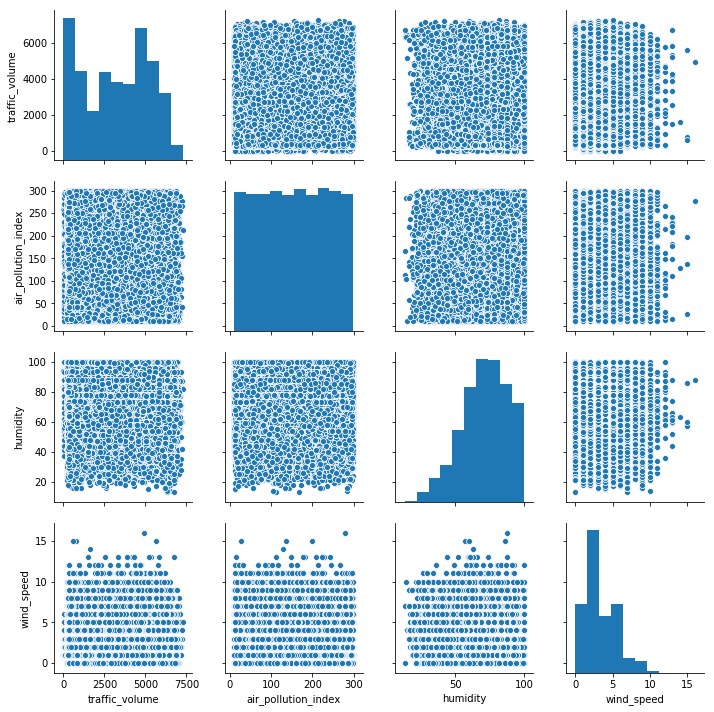

In [0]:
sns.pairplot(trainData[["traffic_volume","air_pollution_index","humidity","wind_speed"]]) 

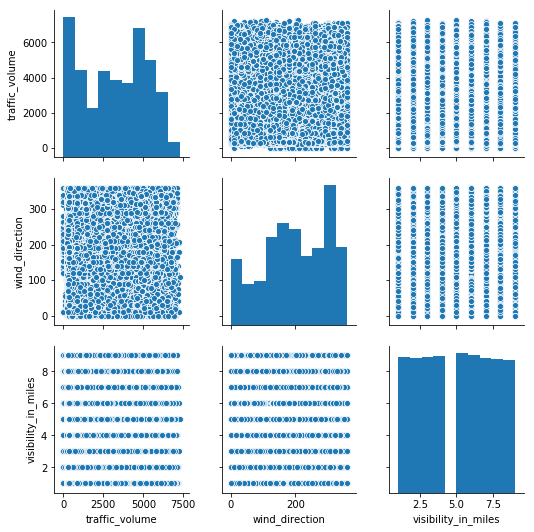

In [0]:
sns.pairplot(trainData[["traffic_volume","wind_direction","visibility_in_miles"]])

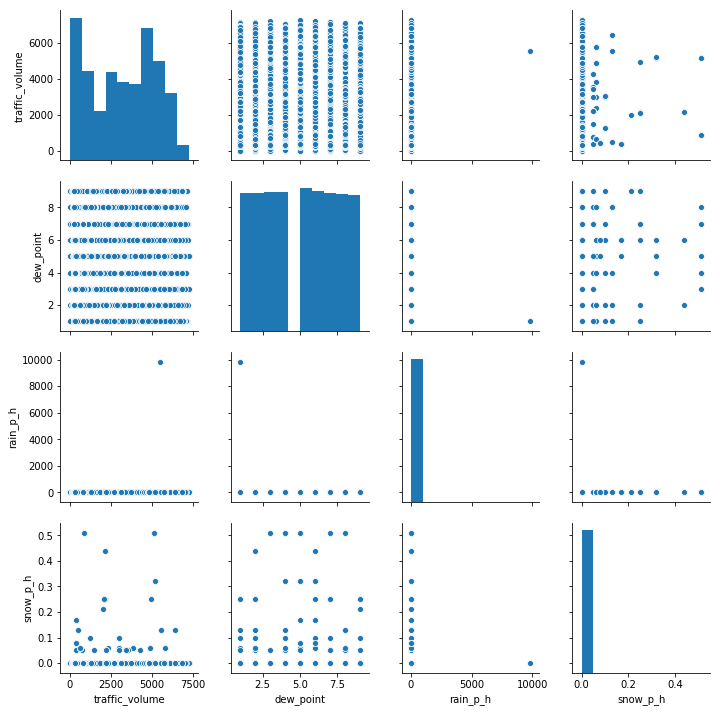

In [0]:
sns.pairplot(trainData[["traffic_volume","dew_point","rain_p_h","snow_p_h"]])

In [0]:
def toCelcius(x): 
  return x-273

trainData['temperature'] = trainData['temperature'].apply(toCelcius)
testData['temperature'] = testData['temperature'].apply(toCelcius)

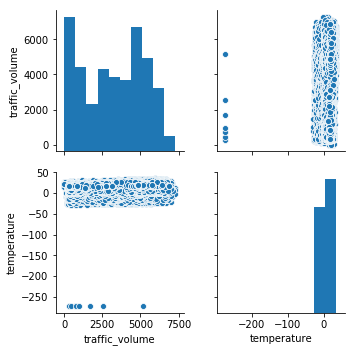

In [0]:
sns.pairplot (trainData[["traffic_volume","temperature"]])

In [0]:
toRemove = ["air_pollution_index","humidity","wind_direction","visibility_in_miles","dew_point"]
for label in toRemove: 
  _,_ = trainData.pop(label),testData.pop(label)   

In [0]:
trainData.head() 

,date_time,wind_speed,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,2,15.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,3,16.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,3,16.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,3,17.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,3,18.14,0.0,0.0,75,Clouds,broken clouds,4918


In [0]:
train_weather_description = trainData.pop('weather_description') 
test_weather_description = testData.pop('weather_description')

In [0]:
train_weather_type = trainData.pop('weather_type')
test_weather_type = testData.pop('weather_type')

In [0]:
trainList = train_weather_description.tolist() 
testList = test_weather_description.tolist()

In [0]:
trainLabels = set(trainList)  
testLabels = set(testList)
unwanted = trainLabels-testLabels
print(unwanted)

idx = []
for i in range (len(trainList)): 
  if trainList[i] in unwanted: 
    idx.append(i)

{'shower snow', 'freezing rain', 'light rain and snow', 'very heavy rain', 'thunderstorm with drizzle', 'SQUALLS'}


In [0]:
len(idx)

33

Since 33 is a small number, we can remove the rows 

In [0]:
trainData.drop(idx,axis=0)

,date_time,wind_speed,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
0,2012-10-02 09:00:00,2,15.28,0.0,0.0,40,5545
1,2012-10-02 10:00:00,3,16.36,0.0,0.0,75,4516
2,2012-10-02 11:00:00,3,16.58,0.0,0.0,90,4767
3,2012-10-02 12:00:00,3,17.13,0.0,0.0,90,5026
4,2012-10-02 13:00:00,3,18.14,0.0,0.0,75,4918
5,2012-10-02 14:00:00,3,18.72,0.0,0.0,1,5181
6,2012-10-02 15:00:00,3,20.17,0.0,0.0,1,5584
7,2012-10-02 16:00:00,3,20.86,0.0,0.0,1,6015
8,2012-10-02 17:00:00,3,21.14,0.0,0.0,20,5791
9,2012-10-02 18:00:00,3,20.10,0.0,0.0,20,4770


In [0]:
import datetime 

In [0]:
def dayTime(X): 
  days = [] 
  times = [] 

  date_time = X.pop("date_time").tolist() 
  for x in date_time: 
    date,time = x.split() 
    days.append(datetime.datetime.strptime(date,"%Y-%m-%d").strftime('%A'))
    times.append(int(time.split(':')[0])) 

  X['day'] = days
  X['time'] = times

In [0]:
dayTime(trainData)

In [0]:
dayTime(testData)

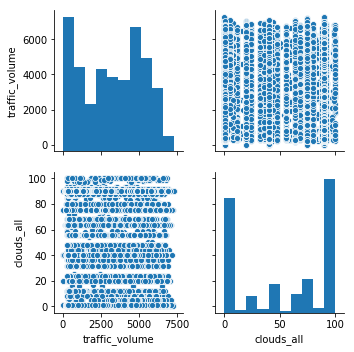

In [0]:
sns.pairplot (trainData[["traffic_volume","clouds_all"]]) 

In [0]:
_ = trainData.pop("clouds_all")

In [0]:
_ = testData.pop("clouds_all")

In [0]:
trainData.head() 

,wind_speed,temperature,rain_p_h,snow_p_h,traffic_volume,day,time
0,2,15.28,0.0,0.0,5545,Tuesday,9
1,3,16.36,0.0,0.0,4516,Tuesday,10
2,3,16.58,0.0,0.0,4767,Tuesday,11
3,3,17.13,0.0,0.0,5026,Tuesday,12
4,3,18.14,0.0,0.0,4918,Tuesday,13


In [0]:
print(trainList)

['scattered clouds', 'broken clouds', 'overcast clouds', 'overcast clouds', 'broken clouds', 'sky is clear', 'sky is clear', 'sky is clear', 'few clouds', 'few clouds', 'few clouds', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'few clouds', 'few clouds', 'few clouds', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'sky is clear', 'few clouds', 'few clouds', 'scattered clouds', 'scattered clouds', 'scattered clouds', 'broken clouds', 'broken clouds', 'broken clouds', 'broken clouds', 'scattered clouds', 'sky is

In [0]:
for label in testLabels: #Weather type
  trainData[label] = (trainList == label)*1.0

In [0]:
l = (trainList == "scattered clouds")
l

False

In [0]:
for label in testLabels: 
  count = 0 
  x = trainData[label].tolist()
  for i in x: 
    if i==1.0: 
      count +=1  
  print("count of",label,"is: ",count)
  if count<=0.05*len(x): 
    _ = trainData.pop(label) 
    _ = testData.pop(label)

count of scattered clouds is:  0
count of drizzle is:  0
count of haze is:  0
count of thunderstorm is:  0
count of shower drizzle is:  0
count of mist is:  0
count of proximity thunderstorm with drizzle is:  0
count of thunderstorm with light drizzle is:  0
count of sleet is:  0
count of proximity thunderstorm is:  0
count of heavy intensity rain is:  0
count of thunderstorm with rain is:  0
count of broken clouds is:  0
count of smoke is:  0
count of light rain is:  0
count of light shower snow is:  0
count of proximity thunderstorm with rain is:  0
count of Sky is Clear is:  0
count of light intensity shower rain is:  0
count of heavy snow is:  0
count of heavy intensity drizzle is:  0
count of moderate rain is:  0
count of thunderstorm with heavy rain is:  0
count of light intensity drizzle is:  0
count of light snow is:  0
count of sky is clear is:  0
count of fog is:  0
count of snow is:  0
count of few clouds is:  0
count of thunderstorm with light rain is:  0
count of overcast 

In [0]:
trainData.head() 

,wind_speed,temperature,rain_p_h,snow_p_h,traffic_volume,day,time
0,2,15.28,0.0,0.0,5545,Tuesday,9
1,3,16.36,0.0,0.0,4516,Tuesday,10
2,3,16.58,0.0,0.0,4767,Tuesday,11
3,3,17.13,0.0,0.0,5026,Tuesday,12
4,3,18.14,0.0,0.0,4918,Tuesday,13


In [0]:
weather_to_drop = ["Fog","Drizzle","Haze","Smoke","Thunderstorm"] 
for weather in weather_to_drop: 
  _,_ = trainData.pop(weather),testData.pop(weather)

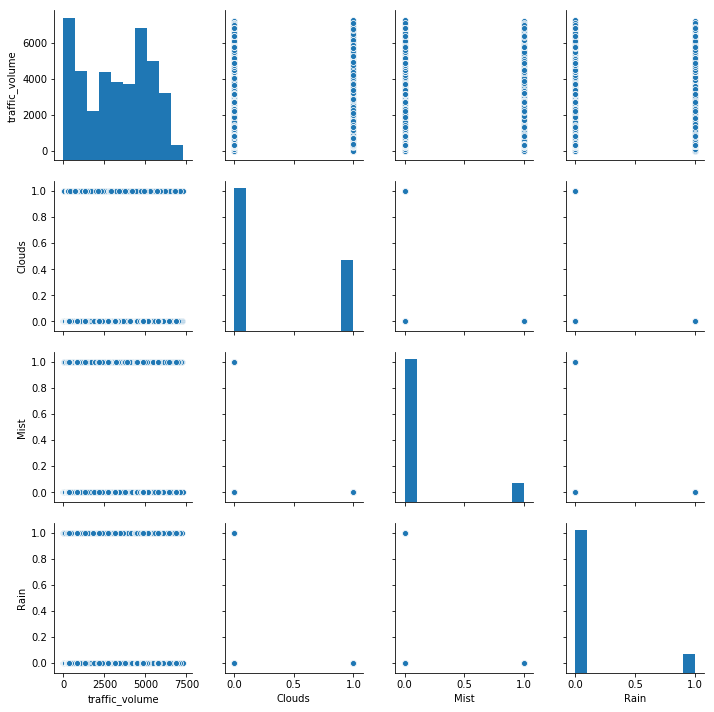

In [0]:
sns.pairplot(trainData[["traffic_volume","Clouds","Mist","Rain"]])

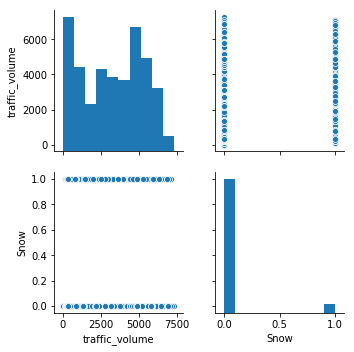

In [0]:
sns.pairplot(trainData[["traffic_volume","Snow"]]) 

In [0]:
trainData.head() 

,traffic_volume,day,time,Rain,Mist,Clouds,Clear,Snow
0,5545,Tuesday,9,0.0,0.0,1.0,0.0,0.0
1,4516,Tuesday,10,0.0,0.0,1.0,0.0,0.0
2,4767,Tuesday,11,0.0,0.0,1.0,0.0,0.0
3,5026,Tuesday,12,0.0,0.0,1.0,0.0,0.0
4,4918,Tuesday,13,0.0,0.0,1.0,0.0,0.0


In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
le.fit(trainData['day'])
trainData['day']= le.transform(trainData['day'])
testData['day']= le.transform(testData['day'])

In [0]:
trainData.head() 

,traffic_volume,day,time,Rain,Mist,Clouds,Clear,Snow
0,5545,5,9,0.0,0.0,1.0,0.0,0.0
1,4516,5,10,0.0,0.0,1.0,0.0,0.0
2,4767,5,11,0.0,0.0,1.0,0.0,0.0
3,5026,5,12,0.0,0.0,1.0,0.0,0.0
4,4918,5,13,0.0,0.0,1.0,0.0,0.0


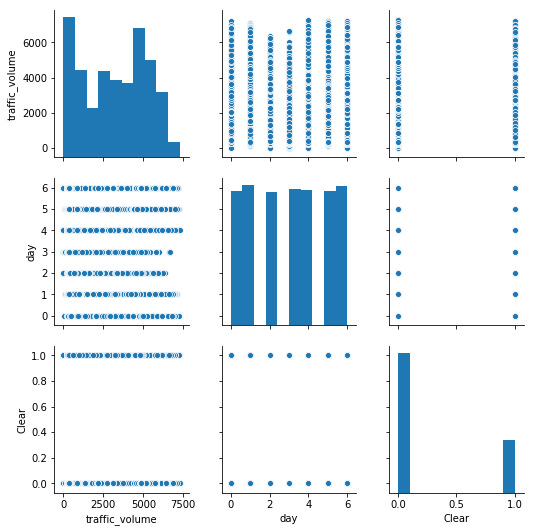

In [0]:
sns.pairplot(trainData[["traffic_volume","day","Clear"]])

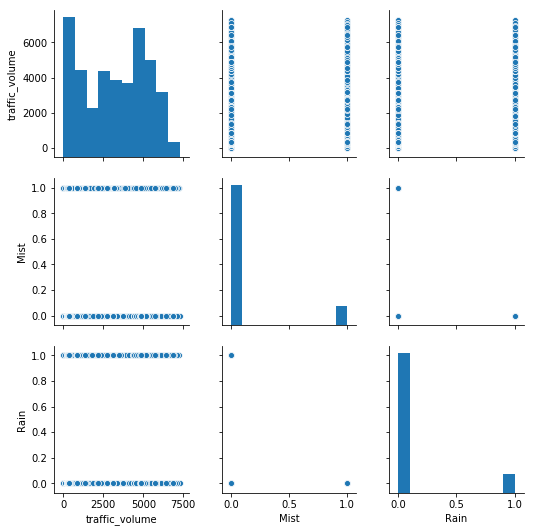

In [0]:
sns.pairplot(trainData[["traffic_volume","Mist","Rain"]]) 

In [0]:
toRemove = ["Rain","Mist","Clouds","Clear","Snow"] 
for feature in toRemove: 
  _,_ = trainData.pop(feature),testData.pop(feature)

In [0]:
trainData.head()

,traffic_volume,day,time
0,5545,5,9
1,4516,5,10
2,4767,5,11
3,5026,5,12
4,4918,5,13


In [0]:
times = set(trainData['time'])
trainTimes = trainData.pop('time') 
testTimes = testData.pop('times') 

for time in times: 
  trainData[str(time)] = (trainTimes == time)*1.0 
  testData[str(time)] = (testTimes == time)*1.0

KeyError: ignored

In [0]:
train_dataset = trainData
test_dataset = testData
train_labels = train_dataset.pop("traffic_volume")

# Normalization

In [0]:
train_stats = train_dataset.describe().transpose() 
train_stats

,count,mean,std,min,25%,50%,75%,max
day,33750.0,3.003793,2.004658,0.0,1.0,3.0,5.0,6.0
time,33750.0,11.404385,6.951078,0.0,5.0,11.0,17.0,23.0


The output shows the different ranges. Thus, it's neccessary to normalize

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
train_stats = normed_train_data.describe().transpose() 
normed_train_data.head() 

,day,time
0,0.995785,-0.345901
1,0.995785,-0.202038
2,0.995785,-0.058176
3,0.995785,0.085687
4,0.995785,0.229549


# PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(.95)
 
pca.fit(normed_train_data) 
columns = ['pca_%i' % i for i in range(pca.n_components_)]

training_pca = pd.DataFrame(pca.transform(normed_train_data),columns=columns)
test_pca= pd.DataFrame(pca.transform(normed_test_data),columns=columns)

In [0]:
training_pca.head() 

,pca_0,pca_1
0,0.459537,-0.948715
1,0.561263,-0.846989
2,0.662989,-0.745263
3,0.764716,-0.643536
4,0.866442,-0.541810


# Model

Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(training_pca.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = training_pca[:10]
example_result = model.predict(example_batch)
example_result

array([[0.0342414 ],
       [0.03472233],
       [0.038836  ],
       [0.048505  ],
       [0.05951555],
       [0.07467162],
       [0.08793932],
       [0.10117453],
       [0.11377456],
       [0.12186958]], dtype=float32)

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print(epoch) 
    print('.', end='')

EPOCHS = 100

history = model.fit(
  training_pca, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

0
....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,314895.304551,350.786621,314895.03125,272112.966056,343.998810,272112.93750,0
1,315767.191685,351.165680,315767.15625,275834.569069,348.530853,275834.50000,1
2,315620.036171,350.745087,315619.96875,265239.249236,335.832825,265239.21875,2
3,314972.064630,351.201508,314972.09375,276898.403620,345.001740,276898.43750,3
4,316543.073144,352.164032,316543.00000,271672.453000,333.274811,271672.46875,4


In [0]:
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,309954.326236,346.208008,309954.21875,260902.397984,336.336395,260902.37500,95
96,310420.382556,345.012634,310420.31250,253971.479417,326.561584,253971.53125,96
97,310141.017625,345.236481,310141.12500,252387.211306,321.013855,252387.31250,97
98,310783.010796,345.071930,310782.96875,269487.109088,347.756378,269487.09375,98
99,310415.629192,344.853333,310415.59375,248649.904694,324.884399,248649.90625,99


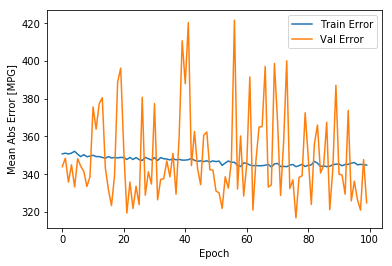

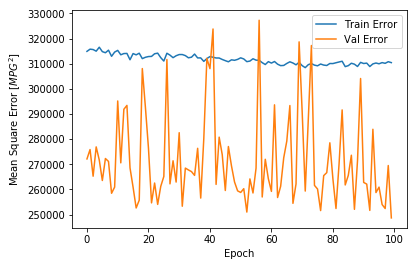

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)